In [1]:
import pandas as pd
import seaborn as sns

In [3]:
posts = pd.read_csv('2020-08-31-MoH-posts.csv')

In [4]:
posts.head()

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Type,Likes,Comments,Shares,Love,...,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Total Interactions,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,Ministry of Health- Uganda,minofhealthUG,767949523254855,171496,2020-08-05 15:13:59 EAT,Native Video,22209,2690,4273,812,...,"The President of Uganda, His Excellency, Yower...",https://www.facebook.com/minofhealthUG/videos/...,NaN,NaN,President Museveni Indoor Video,NaN,NaN,NaN,"31,098","31,098"
1,Ministry of Health- Uganda,minofhealthUG,767949523254855,181221,2020-08-27 13:22:55 EAT,Photo,23845,287,66,35,...,"The Minister of Health, Dr. Jane Ruth Aceng Oc...",https://www.facebook.com/minofhealthUG/photos/...,NaN,NaN,Photos from Ministry of Health- Uganda's post,NaN,NaN,NaN,"24,272","24,272"
2,Ministry of Health- Uganda,minofhealthUG,767949523254855,180459,2020-08-26 15:56:40 EAT,Photo,14956,171,30,14,...,Continuous sensitization of leaders and commun...,https://www.facebook.com/minofhealthUG/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,"15,181","15,181"
3,Ministry of Health- Uganda,minofhealthUG,767949523254855,173330,2020-08-09 07:00:01 EAT,Photo,13305,708,135,39,...,Door-to-door distribution of face masks has ki...,https://www.facebook.com/minofhealthUG/photos/...,NaN,NaN,Photos from Ministry of Health- Uganda's post,NaN,NaN,NaN,"14,275","14,275"
4,Ministry of Health- Uganda,minofhealthUG,767949523254855,175516,2020-08-15 15:05:22 EAT,Native Video,12170,428,744,87,...,"Dr Phionah Atuhebwe, a Ugandan working at Worl...",https://www.facebook.com/minofhealthUG/videos/...,NaN,NaN,Testimony from a Ugandan COVID-19 survivor.,NaN,NaN,NaN,"13,549","13,549"


In [5]:
posts_for_annotation = posts[['Facebook Id', 'Message']]
posts_for_annotation.rename(columns={"Message": "text"}, inplace=True)
posts_for_annotation['label'] = ''

In [6]:
posts_for_annotation.to_csv('MoH-posts-for-annotation.csv')

### Analyze annotated posts

In [7]:
annotated_posts = pd.read_csv('annotated_MoH_posts.csv')
annotated_posts.head()

,annotation_approver,id,label,meta,meta.Facebook Id,text,user
0,NaN,936,5,9,767949523254855,COVID-19 has impacted our lives in various way...,2
1,NaN,927,5,0,767949523254855,"The President of Uganda, His Excellency, Yower...",2
2,NaN,928,5,1,767949523254855,"The Minister of Health, Dr. Jane Ruth Aceng Oc...",2
3,NaN,929,5,2,767949523254855,Continuous sensitization of leaders and commun...,2
4,NaN,930,4,3,767949523254855,Door-to-door distribution of face masks has ki...,2


In [9]:
post_types = {3:'New cases or deaths', 4:'Masks implementation', 
              5:'Other information (covid)', 6:'Other information (non-covid)'}
annotated_posts['label'] = annotated_posts.label.map(post_types)
annotated_posts.head()

,annotation_approver,id,label,meta,meta.Facebook Id,text,user
0,NaN,936,Other information (covid),9,767949523254855,COVID-19 has impacted our lives in various way...,2
1,NaN,927,Other information (covid),0,767949523254855,"The President of Uganda, His Excellency, Yower...",2
2,NaN,928,Other information (covid),1,767949523254855,"The Minister of Health, Dr. Jane Ruth Aceng Oc...",2
3,NaN,929,Other information (covid),2,767949523254855,Continuous sensitization of leaders and commun...,2
4,NaN,930,Masks implementation,3,767949523254855,Door-to-door distribution of face masks has ki...,2


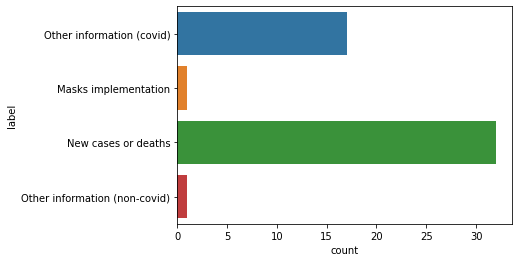

In [11]:
sns.countplot(y='label', data=annotated_posts)